In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [534]:
unicef = pd.read_csv('/Users/vladimirkonovalov/Downloads/stud_math.csv')

In [535]:
display(unicef.head(10))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [536]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [537]:
# Удаляем столбцы, в которых нет ценной для нас информации
# studytime, granular в расшифровке в задаче что 
# означает даный столбец нет
# аббревиатура школы тоже не имеет зачения
# 
unicef.drop(columns = ['studytime, granular', 'school'], axis = 1, inplace = True)

In [538]:
unicef.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,392.0,2.750000,1.098127,0.0,2.0,3.0,4.0,4.0
Fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0
studytime,388.0,2.038660,0.842078,1.0,1.0,2.0,2.0,4.0
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0
famrel,368.0,3.937500,0.927277,-1.0,4.0,4.0,5.0,5.0
freetime,384.0,3.231771,0.993940,1.0,3.0,3.0,4.0,5.0
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0
health,380.0,3.531579,1.396019,1.0,3.0,4.0,5.0,5.0


In [539]:
# учитывая большое кол-во пропусков 
# нужно их устанить чтобы было везде 395

In [540]:
unicef.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [541]:
# дозаполним что большинство учеников живет в городе
unicef['address'].fillna('no address')
unicef['address'].fillna(unicef['address'].value_counts().index[0], inplace = True)

In [542]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     368 non-null    object 
 4   Pstatus     350 non-null    object 
 5   Medu        392 non-null    float64
 6   Fedu        371 non-null    float64
 7   Mjob        376 non-null    object 
 8   Fjob        359 non-null    object 
 9   reason      378 non-null    object 
 10  guardian    364 non-null    object 
 11  traveltime  367 non-null    float64
 12  studytime   388 non-null    float64
 13  failures    373 non-null    float64
 14  schoolsup   386 non-null    object 
 15  famsup      356 non-null    object 
 16  paid        355 non-null    object 
 17  activities  381 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

In [543]:
#  famsize мало того что не удобный показатель, еще и не возможно корретировать
# создадим новый столбец с показателями состава семьи 1 - больше 3 чел 0 - меньше 3 чел.

In [544]:
unicef.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [545]:
unicef.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [546]:
unicef.groupby(by = ['famsize'])['Pstatus'].value_counts()
# получается вместе большинство семей где размер больше 3 живут вместе 

famsize  Pstatus
GT3      T          213
         A           20
LE3      T           81
         A           13
Name: Pstatus, dtype: int64

In [547]:
# от этой зависимость заполним famsize 
# но перед этим заполним  Pstatus 

In [548]:
# дозаполним большинством что живут вместе
unicef['Pstatus'].fillna('T')
unicef['Pstatus'].fillna(unicef['Pstatus'].value_counts().index[0], inplace = True)

In [549]:
unicef.T

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,...,18,18,19,18,18,20,17,21,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Medu,4.0,1.0,1.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,...,2.0,4.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0
Fedu,4.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0,...,2.0,4.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home
reason,course,course,other,home,home,reputation,home,home,home,home,...,other,reputation,course,course,course,course,course,course,course,NaN


In [550]:
unicef.famsize = unicef[['famsize', 'Pstatus']].apply(lambda x: 'GT3' if x[1]=='T' and pd.isnull(x[0]) else 'LE3' if x[1]=='A' and pd.isnull(x[0]) else x[0], axis=1)

In [551]:
unicef.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,LE3,A,4.0,4.0,at_home,teacher,course,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,GT3,T,1.0,1.0,at_home,other,course,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,LE3,T,1.0,1.0,at_home,other,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,GT3,T,4.0,2.0,health,NaN,home,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,GT3,T,3.0,3.0,other,other,home,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,M,16,U,LE3,T,4.0,3.0,services,other,reputation,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,M,16,U,LE3,T,2.0,2.0,other,other,home,...,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,F,17,U,GT3,A,4.0,4.0,other,teacher,home,...,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,M,15,U,LE3,A,3.0,2.0,services,other,home,...,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,M,15,U,GT3,T,3.0,4.0,other,other,home,...,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [552]:
# для заоплнения дальенейших Nan пропусков посмотри корреляцию
unicef.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


In [553]:
# больше всего score коррелирутся с Medu 
unicef.groupby(by = ['score'])['Medu'].value_counts()

score  Medu
0.0    2.0     12
       1.0      9
       3.0      9
       4.0      6
20.0   4.0      1
               ..
90.0   2.0      1
95.0   4.0      3
       2.0      1
       3.0      1
100.0  4.0      1
Name: Medu, Length: 64, dtype: int64

In [554]:
unicef[unicef.Medu == 0.0].score.mean() 

65.0

In [555]:
unicef[unicef.Medu == 1.0].score.mean() 

43.125

In [556]:
unicef[unicef.Medu == 2.0].score.mean() 

49.6

In [557]:
unicef[unicef.Medu == 3.0].score.mean()

51.822916666666664

In [558]:
unicef[unicef.Medu == 4.0].score.mean() 

58.81679389312977

In [559]:
unicef[unicef.Medu == 5.0].score.mean()

nan

In [560]:
# заполним Medu и потом в зависимости от 
# оброзваония матери заполним score

In [561]:
unicef.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [562]:
unicef['Medu'].fillna('4.0')
unicef['Medu'].fillna(unicef['Medu'].value_counts().index[0], inplace = True)

In [563]:
unicef.score = unicef[['score', 'Medu']].apply(lambda x: 65.0 if x[1]== 0.0 and pd.isnull(x[0]) else 43.0 if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)

In [564]:
unicef.score = unicef[['score', 'Medu']].apply(lambda x: 49.0 if x[1]== 2.0 and pd.isnull(x[0]) else 52.0 if x[1]== 3.0 and pd.isnull(x[0]) else 59.0 if x[1]== 4.0 and pd.isnull(x[0]) else x[0], axis=1)

In [565]:
unicef.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [566]:
unicef.groupby(by = ['Fedu'])['score'].value_counts()

Fedu  score
0.0   50.0      1
      80.0      1
1.0   50.0     15
      0.0      10
      40.0      6
               ..
4.0   90.0      3
      25.0      2
      35.0      2
      95.0      1
40.0  60.0      1
Name: score, Length: 69, dtype: int64

In [567]:
unicef.Fedu = unicef[['Fedu', 'score']].apply(lambda x: 1.0 if x[1]== 50.0 and pd.isnull(x[0]) else x[0], axis=1)

In [568]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    float64
 6   Fedu        372 non-null    float64
 7   Mjob        376 non-null    object 
 8   Fjob        359 non-null    object 
 9   reason      378 non-null    object 
 10  guardian    364 non-null    object 
 11  traveltime  367 non-null    float64
 12  studytime   388 non-null    float64
 13  failures    373 non-null    float64
 14  schoolsup   386 non-null    object 
 15  famsup      356 non-null    object 
 16  paid        355 non-null    object 
 17  activities  381 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

In [569]:
# еще одна явная корреляция score коррелирутся с studytime
unicef.groupby(by = ['studytime'])['score'].value_counts()

studytime  score
1.0        50.0     17
           0.0      13
           40.0     11
           60.0     10
           65.0      9
                    ..
4.0        90.0      2
           30.0      1
           80.0      1
           85.0      1
           100.0     1
Name: score, Length: 63, dtype: int64

In [570]:
unicef.Fedu.value_counts() # видна ошибка выброс 40 не естественный

2.0     106
3.0      96
4.0      88
1.0      79
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [571]:
unicef[unicef.Fedu == 40.0].index

Int64Index([11], dtype='int64')

In [572]:
unicef.Fedu.loc[11] = 4.0 # заменили ошибку с 40.0 на 4.0

/Users/vladimirkonovalov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [573]:
unicef.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     79
0.0      2
Name: Fedu, dtype: int64

In [574]:
unicef.groupby(by = ['score'])['Fedu'].value_counts()

score  Fedu
0.0    2.0     11
       1.0     10
       4.0      8
       3.0      5
20.0   3.0      1
               ..
90.0   1.0      2
       2.0      2
95.0   2.0      2
       4.0      1
100.0  3.0      1
Name: Fedu, Length: 68, dtype: int64

In [575]:
# продолжаем дозополнять Fedu
unicef.Fedu = unicef[['Fedu', 'score']].apply(lambda x: 1.0 if x[1]== 0.0 and pd.isnull(x[0]) else x[0], axis=1)

In [576]:
unicef.Fedu.mean()

2.501333333333333

In [577]:
# дозаполним средним Fedu
unicef['Fedu'].fillna(2.5)
unicef['Fedu'].fillna(unicef['Fedu'].value_counts().index[0], inplace = True)

In [578]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    float64
 6   Fedu        395 non-null    float64
 7   Mjob        376 non-null    object 
 8   Fjob        359 non-null    object 
 9   reason      378 non-null    object 
 10  guardian    364 non-null    object 
 11  traveltime  367 non-null    float64
 12  studytime   388 non-null    float64
 13  failures    373 non-null    float64
 14  schoolsup   386 non-null    object 
 15  famsup      356 non-null    object 
 16  paid        355 non-null    object 
 17  activities  381 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

In [579]:
unicef.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [580]:
# дозаполним средним Mjob
unicef['Mjob'].fillna('other')
unicef['Mjob'].fillna(unicef['Mjob'].value_counts().index[0], inplace = True)

In [581]:
unicef.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [582]:
# дозаполним средним Fjob
unicef['Fjob'].fillna('other')
unicef['Fjob'].fillna(unicef['Fjob'].value_counts().index[0], inplace = True)

In [583]:
unicef.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [584]:
# дозаполним средним reason
unicef['reason'].fillna('course')
unicef['reason'].fillna(unicef['reason'].value_counts().index[0], inplace = True)

In [585]:
unicef.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [586]:
# дозаполним средним guardian
unicef['guardian'].fillna('mother')
unicef['guardian'].fillna(unicef['guardian'].value_counts().index[0], inplace = True)

In [587]:
unicef.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [588]:
# дозаполним средним traveltime
unicef['traveltime'].fillna(1.0)
unicef['traveltime'].fillna(unicef['traveltime'].value_counts().index[0], inplace = True)

In [589]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    float64
 6   Fedu        395 non-null    float64
 7   Mjob        395 non-null    object 
 8   Fjob        395 non-null    object 
 9   reason      395 non-null    object 
 10  guardian    395 non-null    object 
 11  traveltime  395 non-null    float64
 12  studytime   388 non-null    float64
 13  failures    373 non-null    float64
 14  schoolsup   386 non-null    object 
 15  famsup      356 non-null    object 
 16  paid        355 non-null    object 
 17  activities  381 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

In [590]:
unicef.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [591]:
# дозаполним средним studytime
unicef['studytime'].fillna(2.0)
unicef['studytime'].fillna(unicef['studytime'].value_counts().index[0], inplace = True)

In [592]:
unicef.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [593]:
# дозаполним средним failures
unicef['failures'].fillna(0.0)
unicef['failures'].fillna(unicef['failures'].value_counts().index[0], inplace = True)

In [594]:
unicef.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [595]:
# дозаполним средним failures
unicef['schoolsup'].fillna('no')
unicef['schoolsup'].fillna(unicef['schoolsup'].value_counts().index[0], inplace = True)

In [596]:
unicef.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

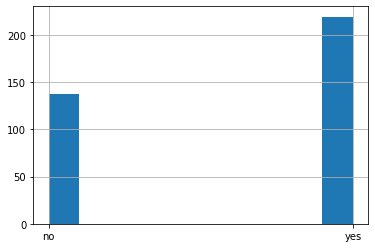

In [597]:
unicef.famsup.hist()
unicef.famsup.describe()

<BarContainer object of 2 artists>

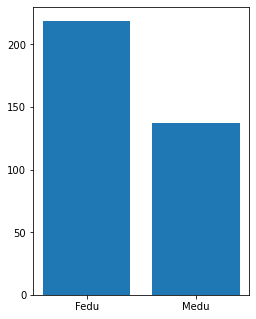

In [598]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])
axes.bar(x = ['Fedu','Medu'], height = unicef['famsup'].value_counts())

In [599]:
unicef.groupby(by = ['Fedu'])['famsup'].value_counts()

Fedu  famsup
0.0   no         1
      yes        1
1.0   no        41
      yes       31
2.0   yes       67
      no        43
3.0   yes       58
      no        32
4.0   yes       62
      no        20
Name: famsup, dtype: int64

In [600]:
# исходя из того то на famsup более влияет Fedu 
# исходя из это заоплним пропуски в famsup
unicef.famsup = unicef[['famsup', 'Fedu']].apply(lambda x: 'no' if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famsup = unicef[['famsup', 'Fedu']].apply(lambda x: 'yes' if x[1]== 2.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famsup = unicef[['famsup', 'Fedu']].apply(lambda x: 'yes' if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famsup = unicef[['famsup', 'Fedu']].apply(lambda x: 'yes' if x[1]== 4.0 and pd.isnull(x[0]) else x[0], axis=1)

In [601]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    float64
 6   Fedu        395 non-null    float64
 7   Mjob        395 non-null    object 
 8   Fjob        395 non-null    object 
 9   reason      395 non-null    object 
 10  guardian    395 non-null    object 
 11  traveltime  395 non-null    float64
 12  studytime   395 non-null    float64
 13  failures    395 non-null    float64
 14  schoolsup   395 non-null    object 
 15  famsup      395 non-null    object 
 16  paid        355 non-null    object 
 17  activities  381 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

In [602]:
unicef.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

<BarContainer object of 2 artists>

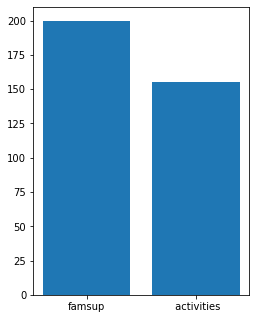

In [603]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])
axes.bar(x = ['famsup',' activities'], height = unicef['paid'].value_counts())

<BarContainer object of 2 artists>

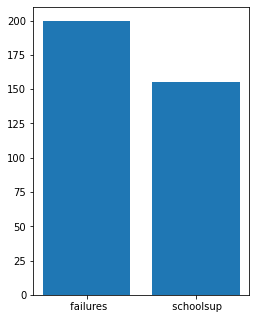

In [604]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])
axes.bar(x = [' failures',' schoolsup'], height = unicef['paid'].value_counts())

In [605]:
unicef.pivot_table(index = 'failures', columns = 'studytime', values = 'paid', aggfunc = 'count')

studytime,1.0,2.0,3.0,4.0
failures,,,,
0.0,62.0,144.0,51.0,25.0
1.0,15.0,22.0,7.0,1.0
2.0,5.0,8.0,3.0,NaN
3.0,7.0,5.0,NaN,NaN


In [606]:
unicef.groupby(by = ['studytime'])['paid'].value_counts()

studytime  paid
1.0        no      67
           yes     22
2.0        no      93
           yes     86
3.0        yes     32
           no      29
4.0        yes     15
           no      11
Name: paid, dtype: int64

In [607]:
# исходя из того то на paid более влияет studytime 
# исходя из это заоплним пропуски в studytime
unicef.paid  = unicef[['paid', 'studytime']].apply(lambda x: 'no' if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.paid  = unicef[['paid','studytime']].apply(lambda x: 'no' if x[1]== 2.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.paid  = unicef[['paid','studytime']].apply(lambda x: 'yes' if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.paid  = unicef[['paid','studytime']].apply(lambda x: 'yes' if x[1]== 4.0 and pd.isnull(x[0]) else x[0], axis=1)

In [608]:
unicef.groupby(by = ['studytime'])['activities'].value_counts()

studytime  activities
1.0        no             55
           yes            42
2.0        yes           101
           no             95
3.0        yes            36
           no             26
4.0        yes            16
           no             10
Name: activities, dtype: int64

In [609]:
# исходя из того то на activities более влияет studytime 
# исходя из это заоплним пропуски в activities
unicef.activities  = unicef[['activities', 'studytime']].apply(lambda x: 'no' if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.activities  = unicef[['activities','studytime']].apply(lambda x: 'yes' if x[1]== 2.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.activities  = unicef[['activities','studytime']].apply(lambda x: 'yes' if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.activities  = unicef[['activities','studytime']].apply(lambda x: 'yes' if x[1]== 4.0 and pd.isnull(x[0]) else x[0], axis=1)

In [610]:
unicef.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [611]:
# дозаполним nursery
unicef['nursery'].fillna('yes')
unicef['nursery'].fillna(unicef['nursery'].value_counts().index[0], inplace = True)

In [612]:
unicef.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [613]:
# дозаполним higher
unicef['higher'].fillna('yes')
unicef['higher'].fillna(unicef['higher'].value_counts().index[0], inplace = True)

In [614]:
unicef.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [615]:
# дозаполним internet
unicef['internet'].fillna('yes')
unicef['internet'].fillna(unicef['internet'].value_counts().index[0], inplace = True)

In [616]:
unicef.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [617]:
# дозаполним romantic
unicef['romantic'].fillna('no')
unicef['romantic'].fillna(unicef['romantic'].value_counts().index[0], inplace = True)

In [618]:
unicef.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [619]:
# исправляем ошибку -1
unicef[unicef.famrel == -1.0].index

Int64Index([25], dtype='int64')

In [620]:
unicef.famrel.loc[25] = 1.0 # заменили ошибку с 40.0 на 4.0

/Users/vladimirkonovalov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [621]:
unicef.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [622]:
unicef.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160777,-0.157545,0.084755,-0.015355,0.228081,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.158186
Medu,-0.160777,1.000000,0.586435,-0.164282,0.073607,-0.243821,-0.013749,0.029000,0.063253,-0.047992,-0.013124,0.203961
Fedu,-0.157545,0.586435,1.000000,-0.113888,0.008118,-0.267302,-0.021947,-0.032625,0.041927,0.013237,0.024411,0.142784
traveltime,0.084755,-0.164282,-0.113888,1.000000,-0.094637,0.049670,-0.019207,-0.011383,0.050800,-0.046027,-0.040324,-0.058698
studytime,-0.015355,0.073607,0.008118,-0.094637,1.000000,-0.166598,0.039005,-0.120215,-0.050773,-0.079415,-0.026502,0.113763
failures,0.228081,-0.243821,-0.267302,0.049670,-0.166598,1.000000,-0.017503,0.094530,0.113897,0.078668,0.057952,-0.332141
famrel,0.067415,-0.013749,-0.021947,-0.019207,0.039005,-0.017503,1.000000,0.172751,0.077167,0.086309,-0.083064,0.052304
freetime,0.029023,0.029000,-0.032625,-0.011383,-0.120215,0.094530,0.172751,1.000000,0.296437,0.061575,0.009292,0.015960
goout,0.135107,0.063253,0.041927,0.050800,-0.050773,0.113897,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.130873
health,-0.065946,-0.047992,0.013237,-0.046027,-0.079415,0.078668,0.086309,0.061575,-0.015608,1.000000,-0.016222,-0.069725


In [623]:
unicef.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [624]:
# дозаполним health
unicef['health'].fillna(5.0)
unicef['health'].fillna(unicef['health'].value_counts().index[0], inplace = True)

In [625]:
unicef.groupby(by = ['famrel'])['health'].value_counts()

famrel  health
1.0     1.0        4
        5.0        3
        3.0        1
2.0     3.0        5
        4.0        4
        2.0        3
        5.0        3
        1.0        2
3.0     3.0       20
        5.0       18
        4.0       10
        2.0        8
        1.0        6
4.0     5.0       74
        3.0       43
        4.0       27
        2.0       21
        1.0       17
5.0     5.0       38
        4.0       19
        3.0       18
        1.0       14
        2.0       10
Name: health, dtype: int64

In [626]:
# исходя из того то на famrel более влияет health
# исходя из это заоплним пропуски в famrel
unicef.famrel  = unicef[['famrel', 'health']].apply(lambda x: 3.0 if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famrel  = unicef[['famrel','health']].apply(lambda x: 4.0 if x[1]== 5.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famrel  = unicef[['famrel','health']].apply(lambda x: 5.0 if x[1]== 5.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famrel  = unicef[['famrel','health']].apply(lambda x: 1.0 if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.famrel  = unicef[['famrel','health']].apply(lambda x: 2.0 if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)

In [627]:
unicef.famrel.value_counts()

4.0    199
5.0     99
3.0     64
2.0     17
1.0     12
Name: famrel, dtype: int64

In [633]:
# дозаполним famrel
unicef['famrel'].fillna(4.0)
unicef['famrel'].fillna(unicef['famrel'].value_counts().index[0], inplace = True)

In [628]:
# дозаполним freetime
unicef['freetime'].fillna(3.0)
unicef['freetime'].fillna(unicef['freetime'].value_counts().index[0], inplace = True)

In [629]:
unicef.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [630]:
unicef.groupby(by = ['freetime'])['goout'].value_counts()

freetime  goout
1.0       2.0       7
          1.0       4
          3.0       4
          4.0       1
          5.0       1
2.0       2.0      26
          3.0      17
          4.0      11
          1.0       5
          5.0       4
3.0       3.0      69
          2.0      43
          4.0      27
          5.0      14
          1.0       6
4.0       4.0      39
          3.0      33
          2.0      18
          5.0      17
          1.0       4
5.0       5.0      16
          2.0       7
          4.0       6
          1.0       4
          3.0       4
Name: goout, dtype: int64

In [631]:
# исходя из того то на goout более влияет freetime
# исходя из это заоплним пропуски в goout
unicef.goout  = unicef[['goout', 'freetime']].apply(lambda x: 2.0 if x[1]== 1.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.goout  = unicef[['goout','freetime']].apply(lambda x: 2.0 if x[1]== 2.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.goout  = unicef[['goout','freetime']].apply(lambda x: 3.0 if x[1]== 3.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.goout  = unicef[['goout','freetime']].apply(lambda x: 4.0 if x[1]== 4.0 and pd.isnull(x[0]) else x[0], axis=1)
unicef.goout  = unicef[['goout','freetime']].apply(lambda x: 5.0 if x[1]== 5.0 and pd.isnull(x[0]) else x[0], axis=1)

In [639]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    float64
 6   Fedu        395 non-null    float64
 7   Mjob        395 non-null    object 
 8   Fjob        395 non-null    object 
 9   reason      395 non-null    object 
 10  guardian    395 non-null    object 
 11  traveltime  395 non-null    float64
 12  studytime   395 non-null    float64
 13  failures    395 non-null    float64
 14  schoolsup   395 non-null    object 
 15  famsup      395 non-null    object 
 16  paid        395 non-null    object 
 17  activities  395 non-null    object 
 18  nursery     395 non-null    object 
 19  higher      395 non-null    o

In [635]:
unicef.groupby(by = ['age'])['absences'].value_counts()

age  absences
15   0.0         28
     2.0         20
     6.0         10
     4.0          9
     8.0          7
                 ..
20   0.0          1
     4.0          1
     212.0        1
21   3.0          1
22   16.0         1
Name: absences, Length: 86, dtype: int64

In [637]:
unicef.absences.mean()

7.2793733681462145

In [638]:
# дозаполним absences
unicef['absences'].fillna(7.0)
unicef['absences'].fillna(unicef['absences'].value_counts().index[0], inplace = True)

In [640]:
unicef.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160777,-0.157545,0.084755,-0.015355,0.228081,0.086958,0.026443,0.143337,-0.060506,0.090515,-0.158186
Medu,-0.160777,1.000000,0.586435,-0.164282,0.073607,-0.243821,0.001456,0.029204,0.048507,-0.066406,-0.010623,0.203961
Fedu,-0.157545,0.586435,1.000000,-0.113888,0.008118,-0.267302,-0.006006,-0.029846,0.033114,-0.012573,0.019964,0.142784
traveltime,0.084755,-0.164282,-0.113888,1.000000,-0.094637,0.049670,0.001077,-0.012496,0.048733,-0.044325,-0.036597,-0.058698
studytime,-0.015355,0.073607,0.008118,-0.094637,1.000000,-0.166598,0.053783,-0.119014,-0.051004,-0.064860,-0.024824,0.113763
failures,0.228081,-0.243821,-0.267302,0.049670,-0.166598,1.000000,-0.003162,0.094826,0.117281,0.072497,0.053869,-0.332141
famrel,0.086958,0.001456,-0.006006,0.001077,0.053783,-0.003162,1.000000,0.139825,0.096024,0.148593,-0.070917,0.031658
freetime,0.026443,0.029204,-0.029846,-0.012496,-0.119014,0.094826,0.139825,1.000000,0.305881,0.064299,0.006355,0.014720
goout,0.143337,0.048507,0.033114,0.048733,-0.051004,0.117281,0.096024,0.305881,1.000000,-0.018397,-0.054252,-0.128333
health,-0.060506,-0.066406,-0.012573,-0.044325,-0.064860,0.072497,0.148593,0.064299,-0.018397,1.000000,-0.020365,-0.079668


In [642]:
def get_stat_dif(column):
    cols = unicef.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(unicef.loc[unicef.loc[:, column] == comb[0], 'score'], 
                        unicef.loc[unicef.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [643]:
for col in ['Medu', 'Fedu', 'studytime', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки absences


In [644]:
for col in ['Pstatus', 'Mjob', 'Fjob', 'reason']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [645]:
for col in ['guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery' ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки paid


In [646]:
for col in ['higher', 'internet ', ' romantic ']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher


KeyError: 'internet '

In [ ]:
# Выводы.

#Итак, в результате EDA для анализа влияния параметров  на результат на гос экземене по мат-ке были получены следующие выводы:

#В данных достаточно мало пустых значений, только столбецы school, age, sex был заполнены полностью.
#Выбросы найдены только в столбцае absences, остальные скорректированы из-за ошибок в таблице явно технических, что позволяет сделать вывод о том, что данные достаточно чистые.

#Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, Fedu, absences, Mjob, paid и higher